In [12]:
import pandas as pd

In [3]:
df = pd.DataFrame({
    'student_id': [1,2,3,4,5,6,7],
    'country': ['China', 'USA', 'UK', 'Japan', 'Korea', 'China', 'USA'],
    'education': ['Master', 'Bachelor', 'Bachelor', 'Master', 'PHD', 'PHD', 'Bachelor'],
    'target': [1, 0, 1, 0, 1, 0, 1]
})
df.head(10)

# 学生信息

,student_id,country,education,target
0,1,China,Master,1
1,2,USA,Bachelor,0
2,3,UK,Bachelor,1
3,4,Japan,Master,0
4,5,Korea,PHD,1
5,6,China,PHD,0
6,7,USA,Bachelor,1


# 类别特征

## Onehot

In [4]:
# one-of-k pandas
pd.get_dummies(df, columns=['education'])

# 1 0 0
# 0 1 0 
# 0 0 1

,student_id,country,target,education_Bachelor,education_Master,education_PHD
0,1,China,1,0,1,0
1,2,USA,0,1,0,0
2,3,UK,1,1,0,0
3,4,Japan,0,0,1,0
4,5,Korea,1,0,0,1
5,6,China,0,0,0,1
6,7,USA,1,1,0,0


In [6]:
# sklearn one hot 
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit_transform(df[['education']]).toarray()

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

## LabelEncoder（自然数编码）

- 降低维度，但是存在大小顺序关系

- 遇到一个类别，取值空间个数 < 10, onehot, 否则就用 label encoder

In [7]:
# sklearn 接口
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['country_LabelEncoder'] = le.fit_transform(df['country'])
df.head(10)

,student_id,country,education,target,country_LabelEncoder
0,1,China,Master,1,0
1,2,USA,Bachelor,0,4
2,3,UK,Bachelor,1,3
3,4,Japan,Master,0,1
4,5,Korea,PHD,1,2
5,6,China,PHD,0,0
6,7,USA,Bachelor,1,4


In [8]:
# pandas 接口
df['country_LabelEncoder'] = pd.factorize(df['country'])[0]
df.head(10)

,student_id,country,education,target,country_LabelEncoder
0,1,China,Master,1,0
1,2,USA,Bachelor,0,1
2,3,UK,Bachelor,1,2
3,4,Japan,Master,0,3
4,5,Korea,PHD,1,4
5,6,China,PHD,0,0
6,7,USA,Bachelor,1,1


In [9]:
pd.factorize(df['country'])

(array([0, 1, 2, 3, 4, 0, 1]),
 Index(['China', 'USA', 'UK', 'Japan', 'Korea'], dtype='object'))

## Ordinal Encoding （顺序编码）

- 引入先验的重要性

In [10]:
df['education'] = df['education'].map(
                    {'Bachelor': 1, 
                    'Master': 2, 
                    'PHD': 3})
df.head(10)

,student_id,country,education,target,country_LabelEncoder
0,1,China,2,1,0
1,2,USA,1,0,1
2,3,UK,1,1,2
3,4,Japan,2,0,3
4,5,Korea,3,1,4
5,6,China,3,0,0
6,7,USA,1,1,1


## BinaryEncoder（二进制编码）

In [14]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols= ['country'])

pd.concat([df, encoder.fit_transform(df['country']).iloc[:, 1:]], axis=1)

,student_id,country,education,target,country_LabelEncoder,country_1,country_2
0,1,China,2,1,0,0,1
1,2,USA,1,0,1,1,0
2,3,UK,1,1,2,1,1
3,4,Japan,2,0,3,0,0
4,5,Korea,3,1,4,0,1
5,6,China,3,0,0,0,1
6,7,USA,1,1,1,1,0


## Frequency/Count Encoding

- 以出现的频率进行编码，比较依赖训练集

In [15]:
df['country_count'] = df['country'].map(df['country'].value_counts()) / len(df)
df.head(10)

,student_id,country,education,target,country_LabelEncoder,country_count
0,1,China,2,1,0,0.285714
1,2,USA,1,0,1,0.285714
2,3,UK,1,1,2,0.142857
3,4,Japan,2,0,3,0.142857
4,5,Korea,3,1,4,0.142857
5,6,China,3,0,0,0.285714
6,7,USA,1,1,1,0.285714


In [16]:
df['country_count'] = df['country'].map(df['country'].value_counts())
df.head(10)

,student_id,country,education,target,country_LabelEncoder,country_count
0,1,China,2,1,0,2
1,2,USA,1,0,1,2
2,3,UK,1,1,2,1
3,4,Japan,2,0,3,1
4,5,Korea,3,1,4,1
5,6,China,3,0,0,2
6,7,USA,1,1,1,2


## Mean/Target Encoding

- 以类别的均值作为特征编码

In [19]:
df.groupby(['country'])['target'].mean()

country
China    0.5
Japan    0.0
Korea    1.0
UK       1.0
USA      0.5
Name: target, dtype: float64

In [20]:
df['country_target'] = df['country'].map(df.groupby(['country'])['target'].mean())
df.head(10)

,student_id,country,education,target,country_LabelEncoder,country_count,country_target
0,1,China,2,1,0,2,0.5
1,2,USA,1,0,1,2,0.5
2,3,UK,1,1,2,1,1.0
3,4,Japan,2,0,3,1,0.0
4,5,Korea,3,1,4,1,1.0
5,6,China,3,0,0,2,0.5
6,7,USA,1,1,1,2,0.5


# 数值特征

- 容易出现异常值和离群点

In [21]:
df = pd.DataFrame({
    'student_id': [1,2,3,4,5,6,7],
    'country': ['China', 'USA', 'UK', 'Japan', 'Korea', 'China', 'USA'],
    'education': ['Master', 'Bachelor', 'Bachelor', 'Master', 'PHD', 'PHD', 'Bachelor'],
    'age': [34.5, 28.9, 19.5, 23.6, 19.8, 29.8, 31.7],
    'target': [1, 0, 1, 0, 1, 0, 1]
})
df.head(10)

,student_id,country,education,age,target
0,1,China,Master,34.5,1
1,2,USA,Bachelor,28.9,0
2,3,UK,Bachelor,19.5,1
3,4,Japan,Master,23.6,0
4,5,Korea,PHD,19.8,1
5,6,China,PHD,29.8,0
6,7,USA,Bachelor,31.7,1


## Round

In [22]:
# 年龄取整，数值类型缩放
df['age_round1'] = df['age'].round()
df['age_round2'] = (df['age'] / 10).astype(int)
df.head(10)

,student_id,country,education,age,target,age_round1,age_round2
0,1,China,Master,34.5,1,34.0,3
1,2,USA,Bachelor,28.9,0,29.0,2
2,3,UK,Bachelor,19.5,1,20.0,1
3,4,Japan,Master,23.6,0,24.0,2
4,5,Korea,PHD,19.8,1,20.0,1
5,6,China,PHD,29.8,0,30.0,2
6,7,USA,Bachelor,31.7,1,32.0,3


## Box/Bins

- 数值类型分箱

In [23]:
df['age_<20'] = (df['age'] <= 20).astype(int)
df['age_20-25'] = ((df['age'] > 20) & (df['age'] <=25)).astype(int)
df['age_20-25'] = ((df['age'] > 25) & (df['age'] <= 30)).astype(int)
df['age_>30'] = (df['age'] > 30).astype(int)
df.head(10)

,student_id,country,education,age,target,age_round1,age_round2,age_<20,age_20-25,age_>30
0,1,China,Master,34.5,1,34.0,3,0,0,1
1,2,USA,Bachelor,28.9,0,29.0,2,0,1,0
2,3,UK,Bachelor,19.5,1,20.0,1,1,0,0
3,4,Japan,Master,23.6,0,24.0,2,0,0,0
4,5,Korea,PHD,19.8,1,20.0,1,1,0,0
5,6,China,PHD,29.8,0,30.0,2,0,1,0
6,7,USA,Bachelor,31.7,1,32.0,3,0,0,1


# 特征重要性

Populating the interactive namespace from numpy and matplotlib
[0.04195849 0.00098763 0.00637507 0.00065138 0.02038956 0.47713059
 0.01219833 0.06477881 0.00415197 0.01491484 0.01672033 0.0114899
 0.32825309]


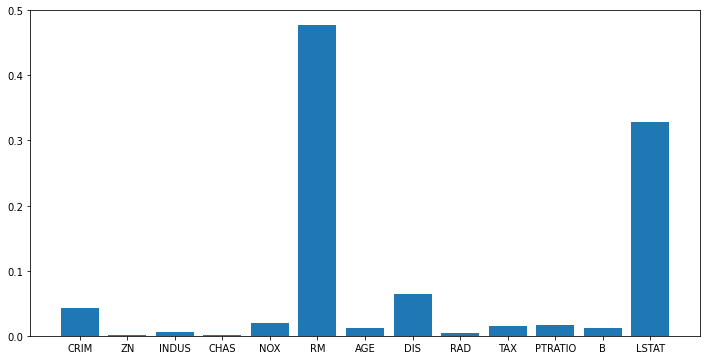

In [1]:
%pylab inline
import numpy as np
from sklearn.ensemble import RandomForestRegressor

from sklearn.datasets import load_boston
data = load_boston()

# 基于随机森林获取特征重要性
rf = RandomForestRegressor()
rf.fit(data.data, data.target);
print(rf.feature_importances_)

plt.figure(figsize=(12, 6))
plt.bar(range(1, 14), rf.feature_importances_)
_ = plt.xticks(range(1, 14), data.feature_names)

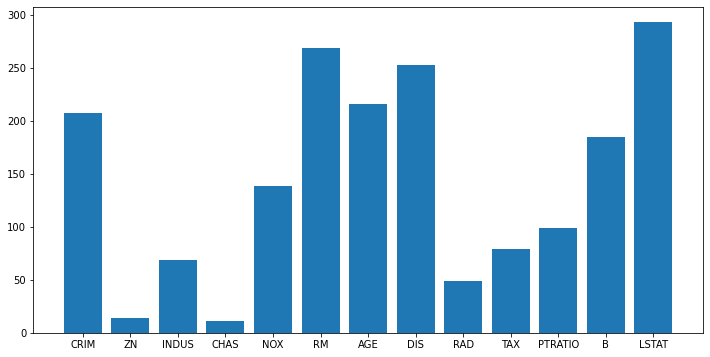

In [2]:
import numpy as np
from lightgbm import LGBMRegressor
data = load_boston()

# 基于 light gbm 获取 特征重要性
clf = LGBMRegressor()
clf.fit(data.data, data.target)

plt.figure(figsize=(12, 6))
plt.bar(range(1, 14), clf.feature_importances_)
_ = plt.xticks(range(1, 14), data.feature_names)

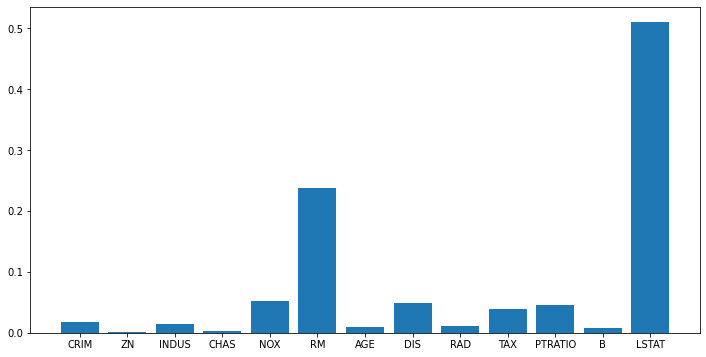

In [3]:
import numpy as np
from xgboost import XGBRegressor
data = load_boston()

# 基于 xgboost 获取特征重要性
clf = XGBRegressor()
clf.fit(data.data, data.target)

plt.figure(figsize=(12, 6))
plt.bar(range(1, 14), clf.feature_importances_)
_ = plt.xticks(range(1, 14), data.feature_names)

# 特征筛选

 - 选择最有效的特征

## 1. 利用方差

    - 字段方差
    
    - 缺失值比例 进行删减
    
    - 分布一致性
    
    - 离群点
    
    - 标签相关性

In [4]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
# 基于方差进行筛选
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [5]:
sel.fit_transform(data.data)
print(data.feature_names[~sel.get_support()])
print(data.feature_names)

['CHAS' 'NOX']
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## 利用相关性

In [6]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression

# 基于 sklearn 的 相关性 特征选择
sel = SelectKBest(f_regression, k='all').fit(data.data, data.target)
sel.fit_transform(data.data, data.target)
print(data.feature_names)
print(sel.scores_)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[ 89.48611476  75.2576423  153.95488314  15.97151242 112.59148028
 471.84673988  83.47745922  33.57957033  85.91427767 141.76135658
 175.10554288  63.05422911 601.61787111]


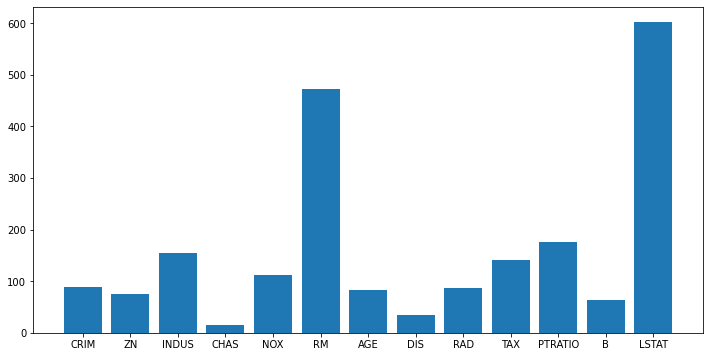

In [7]:
plt.figure(figsize=(12, 6))
plt.bar(range(data.data.shape[1]), sel.scores_)
_ = plt.xticks(range(data.data.shape[1]), data.feature_names)

## 利用线性模型

    - 基于相关系数进行筛选

In [8]:
from sklearn.svm import LinearSVR
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVR().fit(data.data, data.target)
print(data.feature_names)
print(lsvc.coef_)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[-0.0783191   0.05713308 -0.02545579  0.36350549  0.18685863  4.54132077
  0.01644053 -0.76724972  0.22620153 -0.0067046  -0.22484398  0.01824738
 -0.49645808]


/home/bright/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


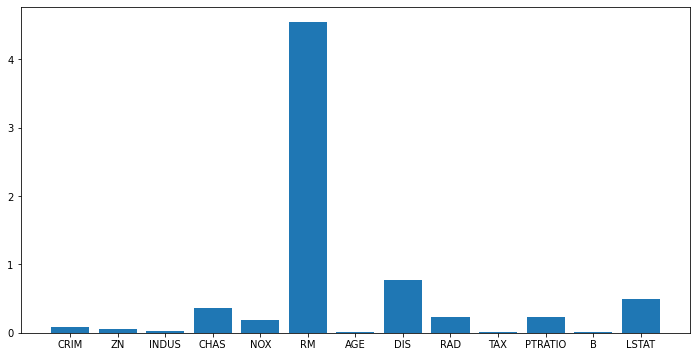

In [9]:
plt.figure(figsize=(12, 6))
plt.bar(range(data.data.shape[1]), np.abs(lsvc.coef_))
_ = plt.xticks(range(data.data.shape[1]), data.feature_names)

## 迭代消除

In [89]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesRegressor(n_estimators=50)
clf = clf.fit(data.data, data.target)
clf.feature_importances_

array([0.03224007, 0.00315812, 0.03973888, 0.01416753, 0.03835724,
       0.3111007 , 0.02238004, 0.03200759, 0.02188213, 0.04772824,
       0.04986004, 0.01772709, 0.36965235])

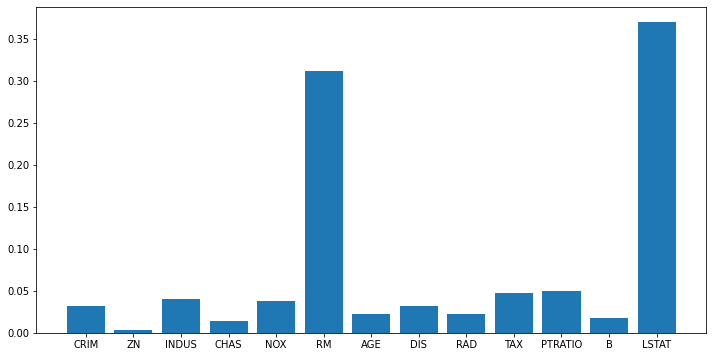

In [90]:
plt.figure(figsize=(12, 6))
plt.bar(range(data.data.shape[1]), clf.feature_importances_)
_ = plt.xticks(range(data.data.shape[1]), data.feature_names)

## 排列重要性(Permutation Importance)

    - 随机打散特征，验证特征重要性

In [163]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.inspection import permutation_importance
clf = RandomForestRegressor().fit(data.data, data.target)
result = permutation_importance(clf, data.data, data.target, n_repeats=10,
                                random_state=0)
result.importances_mean

array([4.76156049e-02, 5.08557938e-04, 5.27477974e-03, 5.08443014e-04,
       4.33689240e-02, 5.41256342e-01, 1.77306889e-02, 1.22957618e-01,
       3.09760000e-03, 1.86233335e-02, 3.13693371e-02, 9.65301163e-03,
       5.61727832e-01])

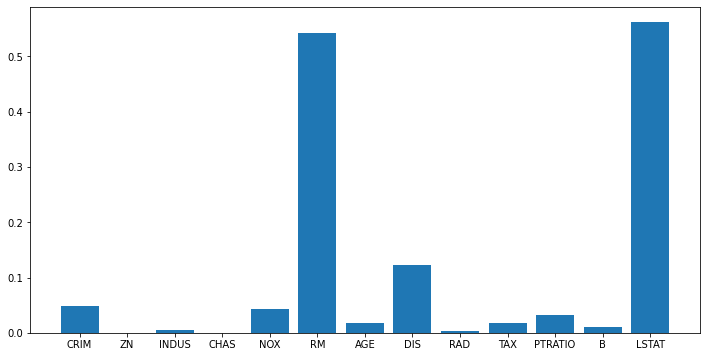

In [164]:
plt.figure(figsize=(12, 6))
plt.bar(range(data.data.shape[1]), result.importances_mean)
_ = plt.xticks(range(data.data.shape[1]), data.feature_names)

In [10]:
# 对数据集计算特征重要性（基于随机森林）
def get_feature_importances(data, target, feaure_name, shuffle, seed=None):
    
    # Shuffle target if required
    # 打散特征 其实就是打散 类别特征，查看 特征和类别之间的关系
    y = target.copy()
    if shuffle:
        np.random.shuffle(y)
    
    clf = RandomForestRegressor()
    clf.fit(data, y)
    imp_df = pd.DataFrame()
    imp_df["feature"] = feaure_name
    imp_df["importance_gain"] = clf.feature_importances_
    
    return imp_df

In [13]:
# 记录正常标签的下特征的重要性
actual_imp_df = get_feature_importances(data.data, data.target, data.feature_names, False)

In [18]:
null_imp_df = pd.DataFrame()
nb_runs = 40
import time
start = time.time()
dsp = ''
for i in range(nb_runs):
    # Get current run importances
    
    imp_df = get_feature_importances(data.data, data.target, data.feature_names, True)
    imp_df['run'] = i + 1 
    
    # Concat the latest importances with the old ones
    null_imp_df = pd.concat([null_imp_df, imp_df], axis=0)
    
#     print(imp_df)
#     print(null_imp_df)
    
    # Erase previous message
    for l in range(len(dsp)):
        print('\b', end='', flush=True)
    # Display current run and time used
    spent = (time.time() - start) / 60
    dsp = 'Done with %4d of %4d (Spent %5.1f min)' % (i + 1, nb_runs, spent)
    print(dsp)

Done with    1 of   40 (Spent   0.0 min)
Done with    2 of   40 (Spent   0.0 min)
Done with    3 of   40 (Spent   0.0 min)
Done with    4 of   40 (Spent   0.0 min)
Done with    5 of   40 (Spent   0.0 min)
Done with    6 of   40 (Spent   0.0 min)
Done with    7 of   40 (Spent   0.0 min)
Done with    8 of   40 (Spent   0.0 min)
Done with    9 of   40 (Spent   0.0 min)
Done with   10 of   40 (Spent   0.0 min)
Done with   11 of   40 (Spent   0.0 min)
Done with   12 of   40 (Spent   0.1 min)
Done with   13 of   40 (Spent   0.1 min)
Done with   14 of   40 (Spent   0.1 min)
Done with   15 of   40 (Spent   0.1 min)
Done with   16 of   40 (Spent   0.1 min)
Done with   17 of   40 (Spent   0.1 min)
Done with   18 of   40 (Spent   0.1 min)
Done with   19 of   40 (Spent   0.1 min)
Done with   20 of   40 (Spent   0.1 min)
Done with   21 of   40 (Spent   0.1 min)
Done with   22 of   40 (Spent   0.1 min)
Done with   23 of   40 (Spent   0.1 min)
Done with   24 of   40 (Spent   0.1 min)
Done with   25 o

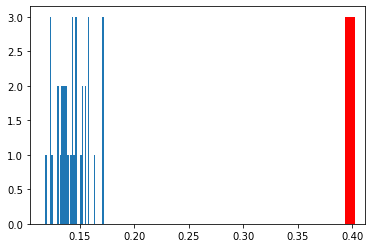

In [19]:
feat = 'RM'
# 绘制打乱之后的特征重要性
ax = plt.hist(null_imp_df[null_imp_df['feature'] == feat]['importance_gain'], bins=nb_runs)

# 绘制实际特征重要性
plt.vlines(x=actual_imp_df.loc[actual_imp_df['feature'] == feat, 'importance_gain'].mean(), 
               ymin=0, ymax=np.max(ax[0]), color='r',linewidth=10, label='Real Target')

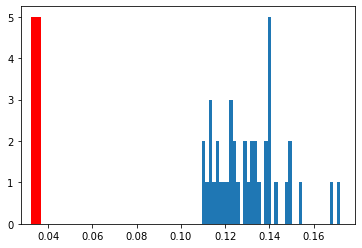

In [20]:
feat = 'CRIM'
ax = plt.hist(null_imp_df[null_imp_df['feature'] == feat]['importance_gain'], bins=nb_runs)
plt.vlines(x=actual_imp_df.loc[actual_imp_df['feature'] == feat, 'importance_gain'].mean(), 
               ymin=0, ymax=np.max(ax[0]), color='r',linewidth=10, label='Real Target')

In [21]:
null_imp_df

,feature,importance_gain,run
0,CRIM,0.117077,1
1,ZN,0.018091,1
2,INDUS,0.033837,1
3,CHAS,0.004426,1
4,NOX,0.062382,1
...,...,...,...
8,RAD,0.022272,40
9,TAX,0.029940,40
10,PTRATIO,0.045000,40
11,B,0.147646,40
